# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | abha
Processing Record 3 of Set 1 | yanji
Processing Record 4 of Set 1 | santa cruz
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | cravo norte
Processing Record 13 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 1 | sovetskiy
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | sorvag
City not found. Skipping...
Processing Record 19 of Set 1 | rabat
Processing Record 20 of Set 1 | sh

Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | san jose
Processing Record 43 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | commerce city
Processing Record 46 of Set 4 | ulaangom
Processing Record 47 of Set 4 | clinton
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | kathu
Processing Record 0 of Set 5 | sidrolandia
Processing Record 1 of Set 5 | conceicao do araguaia
Processing Record 2 of Set 5 | yakeshi
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | barrow
Processing Record 6 of Set 5 | novyye burasy
Processing Record 7 of Set 5 | ambunti
Processing Record 8 of Set 5 | zeya
Processing Record 9 of Set 5 | zaysan
Processing Record 10 of Set 5 | salisbury
Processing Record 11 of Set 5 | yulara
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | sa

Processing Record 32 of Set 8 | skjervoy
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | lasa
Processing Record 36 of Set 8 | linchuan
City not found. Skipping...
Processing Record 37 of Set 8 | turukhansk
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | malanje
Processing Record 40 of Set 8 | barra
Processing Record 41 of Set 8 | tuy hoa
Processing Record 42 of Set 8 | uyuni
Processing Record 43 of Set 8 | talnakh
Processing Record 44 of Set 8 | nueva concepcion
Processing Record 45 of Set 8 | kupang
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | mvuma
Processing Record 48 of Set 8 | mikhaylovka
Processing Record 49 of Set 8 | naze
Processing Record 0 of Set 9 | dhule
Processing Record 1 of Set 9 | sompeta
Processing Record 2 of Set 9 | caraz
Processing Record 3 of Set 9 | danilovka
Processing Record 4 of Set 9 | sola
Processing Record 5 of Set 9 | palmer
Processing Reco

Processing Record 24 of Set 12 | abu samrah
Processing Record 25 of Set 12 | kamuli
Processing Record 26 of Set 12 | booue
Processing Record 27 of Set 12 | rafai
Processing Record 28 of Set 12 | san vicente
Processing Record 29 of Set 12 | juneau
Processing Record 30 of Set 12 | aporawan
City not found. Skipping...
Processing Record 31 of Set 12 | zalantun
Processing Record 32 of Set 12 | puyang
Processing Record 33 of Set 12 | wamba
Processing Record 34 of Set 12 | salalah
Processing Record 35 of Set 12 | broome
Processing Record 36 of Set 12 | canon city
Processing Record 37 of Set 12 | tabou
Processing Record 38 of Set 12 | ouesso
Processing Record 39 of Set 12 | borogontsy
Processing Record 40 of Set 12 | eyl
Processing Record 41 of Set 12 | fort nelson
Processing Record 42 of Set 12 | ornes
Processing Record 43 of Set 12 | beroroha
Processing Record 44 of Set 12 | kapit
Processing Record 45 of Set 12 | boa vista
Processing Record 46 of Set 12 | palu
Processing Record 47 of Set 12 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,276.22,37,0,4.12,US,1680455750
1,abha,18.2164,42.5053,290.05,77,20,2.06,SA,1680455931
2,yanji,42.9075,129.5078,279.53,83,22,1.36,CN,1680455931
3,santa cruz,-17.8000,-63.1667,304.85,58,40,1.54,BO,1680455932
4,tiksi,71.6872,128.8694,263.07,78,100,14.57,RU,1680455933


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,276.22,37,0,4.12,US,1680455750
1,abha,18.2164,42.5053,290.05,77,20,2.06,SA,1680455931
2,yanji,42.9075,129.5078,279.53,83,22,1.36,CN,1680455931
3,santa cruz,-17.8000,-63.1667,304.85,58,40,1.54,BO,1680455932
4,tiksi,71.6872,128.8694,263.07,78,100,14.57,RU,1680455933


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

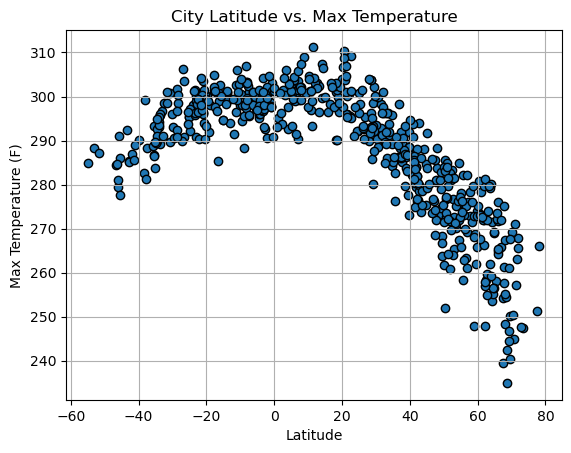

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

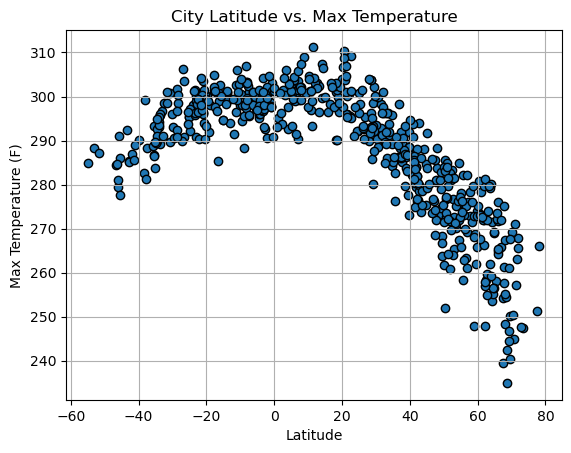

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

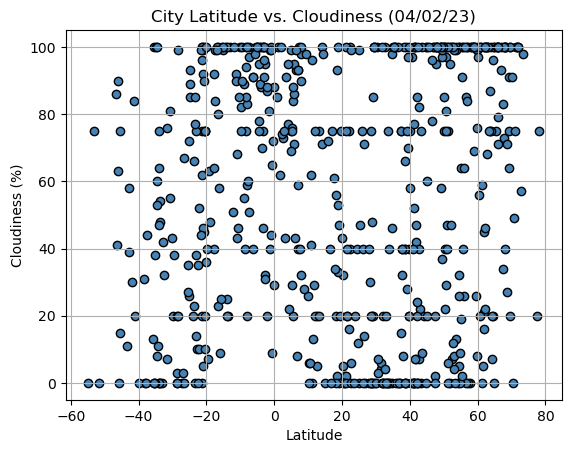

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

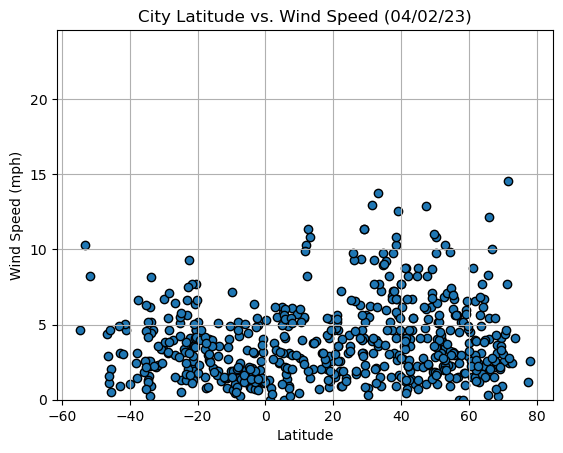

In [11]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Set the chart title and axes labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the y axis limits
plt.ylim(0, max(city_data_df["Wind Speed"])+10)

# Incorporate the grid
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Run linear regression on x and y values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot with linear regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate the linear regression equation and r-value
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.annotate(f"r-squared = {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1]-20), fontsize=15,color="red")

    # Set x and y limits
    plt.xlim(min(x_values)-5, max(x_values)+5)
    plt.ylim(min(y_values)-5, max(y_values)+5)

    # Set x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set plot title
    plt.title(title)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,276.22,37,0,4.12,US,1680455750
1,abha,18.2164,42.5053,290.05,77,20,2.06,SA,1680455931
2,yanji,42.9075,129.5078,279.53,83,22,1.36,CN,1680455931
4,tiksi,71.6872,128.8694,263.07,78,100,14.57,RU,1680455933
6,dikson,73.5069,80.5464,247.45,100,98,4.09,RU,1680455934


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,santa cruz,-17.8000,-63.1667,304.85,58,40,1.54,BO,1680455932
5,ushuaia,-54.8000,-68.3000,284.96,50,0,4.63,AR,1680455914
10,chuy,-33.6971,-53.4616,295.84,45,48,0.92,UY,1680455936
11,avarua,-21.2078,-159.7750,299.18,78,75,3.60,CK,1680455936
12,rikitea,-23.1203,-134.9692,300.14,81,38,6.65,PF,1680455936


###  Temperature vs. Latitude Linear Regression Plot

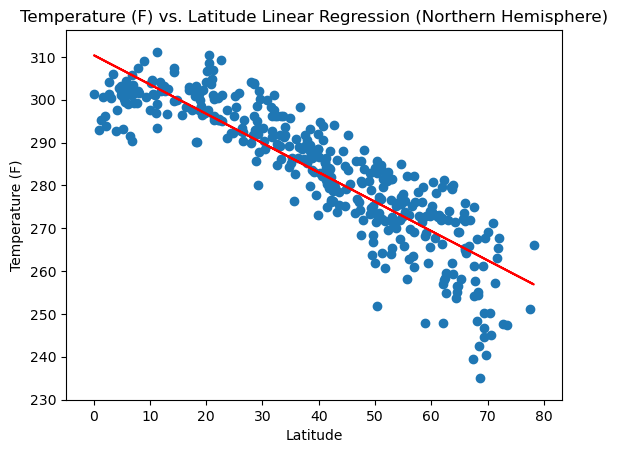

In [15]:
#Linear regression on Northern Hemisphere temperature vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Temperature (F) vs. Latitude Linear Regression (Northern Hemisphere)"
xlabel = "Latitude"
ylabel = "Temperature (F)"
text_coordinates = (0, -30)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

#Save the figure
plt.savefig("output_data/Fig5.png")

#Show plot
plt.show()





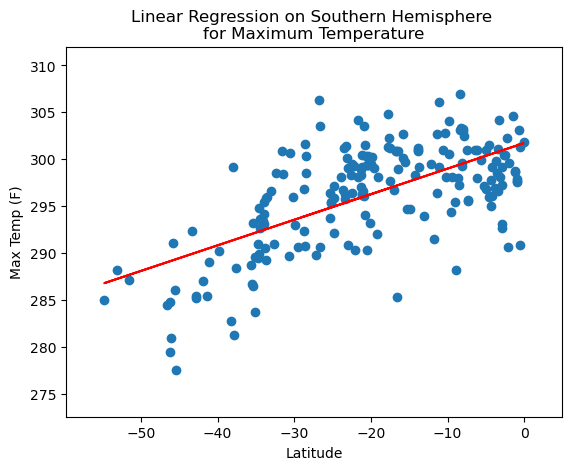

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere \nfor Maximum Temperature', 'Latitude', 'Max Temp (F)', (-50, 90))
plt.savefig("output_data/Fig2.png")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

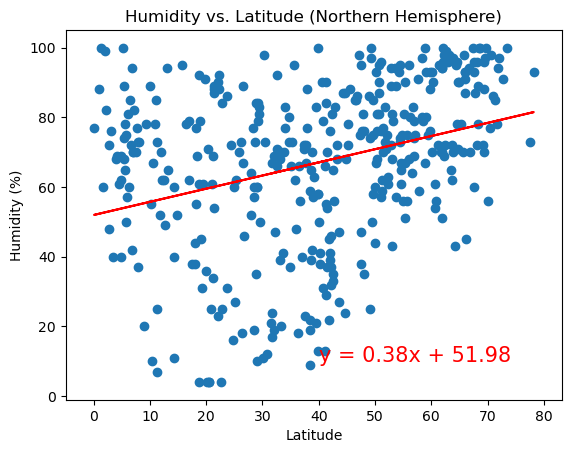

In [17]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Plot linear regression for Humidity vs. Latitude in Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Latitude (Northern Hemisphere)", "Latitude", "Humidity (%)", (40, 10))

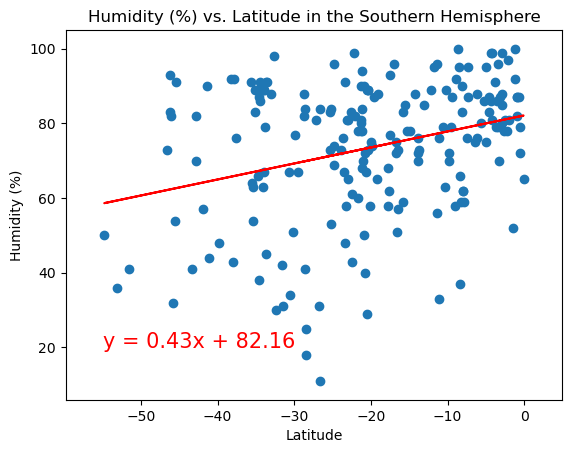

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity (%) vs. Latitude in the Southern Hemisphere", "Latitude", "Humidity (%)", (-55,20))
plt.savefig("output_data/Fig8.png")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

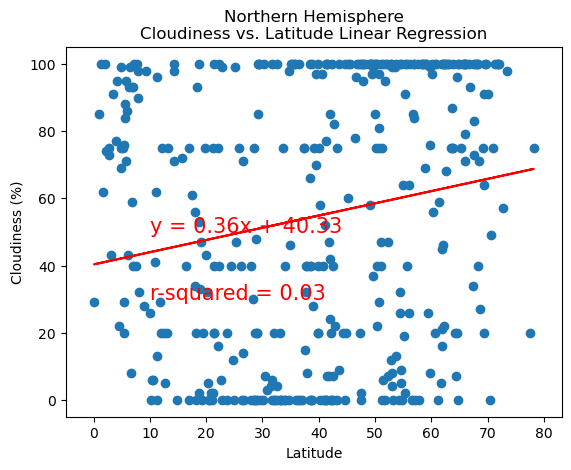

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call plot_linear_regression function and pass x and y values along with title, x and y labels, and text coordinates
plot_linear_regression(x_values, y_values, "Northern Hemisphere\nCloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness (%)", (10,50))

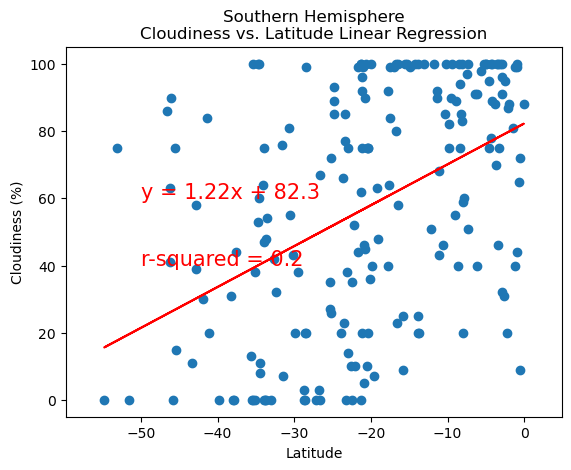

In [20]:
# Southern Hemisphere
# Define variables for x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call plot_linear_regression function and pass x and y values along with title, x and y labels, and text coordinates
plot_linear_regression(x_values, y_values, "Southern Hemisphere\nCloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness (%)", (-50,60))

### Wind Speed vs. Latitude Linear Regression Plot

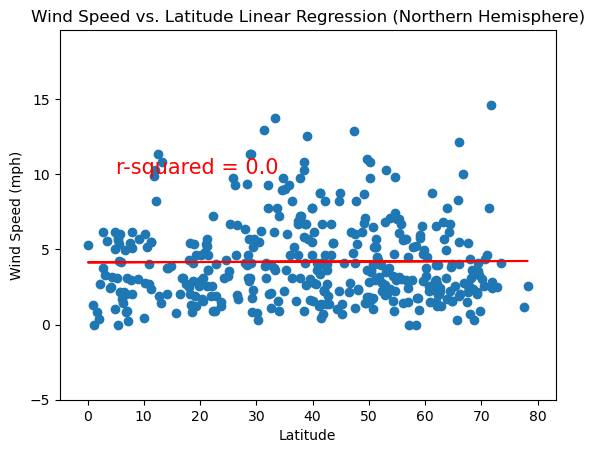

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
"Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)",
"Latitude", "Wind Speed (mph)", (5,30))

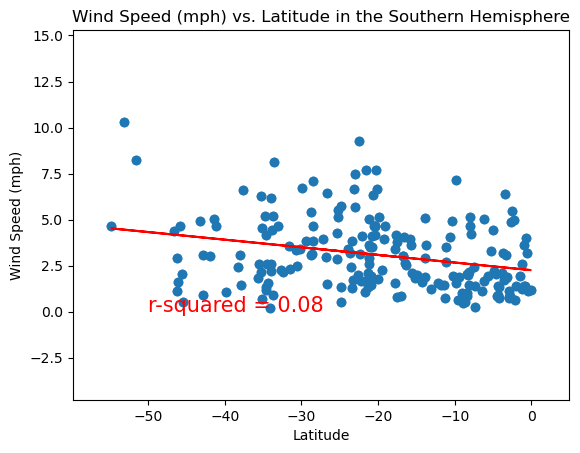

In [22]:
#Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color="steelblue")

#Call the function to create linear regression and plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
"Wind Speed (mph) vs. Latitude in the Southern Hemisphere",
"Latitude", "Wind Speed (mph)", (-50, 20))